In [6]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [7]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    #file_name = 'csvFile_2021_04_28'
    #file_name = 'csvFile_2021_04_28'
    file_name = 'csvFile_2021_05_24'
    #file_name = 'DLTemLongerDatasetDischargecsvFile_2021_05_20'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath


In [8]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [9]:
fileNameForDLFigures(midfix = 'test')

'/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/04_06_2021/test2021_05_24.svg'

In [10]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath
#modelDir(ModelName='first')

In [11]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [12]:
gross_tem = df_gross[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]

In [13]:
gross_tem_two = df_gross[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
#gross_tem_two = df_gross[['T0', 'T1']]
gross_tem_two

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,22.6232,23.0288,23.2993,23.8403,24.0770,24.4490,24.7534,25.3284,25.6329,25.6329
1,22.6232,22.9950,23.3331,23.8064,24.0770,24.4152,24.7534,25.3284,25.6667,25.6329
2,22.6232,23.0288,23.3331,23.8064,24.0770,24.4490,24.8548,25.2946,25.5991,25.5991
3,22.6232,23.0288,23.2993,23.8064,24.0432,24.3813,24.8887,25.2946,25.6329,25.5991
4,22.6232,23.0288,23.3331,23.7726,24.0770,24.5843,24.8887,25.3284,25.6667,25.6667
...,...,...,...,...,...,...,...,...,...,...
1291,22.2852,24.2461,24.2461,24.4828,24.3137,24.4828,24.5166,24.7196,25.5991,45.9600
1292,22.2852,24.2461,24.2799,24.4828,24.3475,24.4490,24.5504,24.7196,25.4637,45.9260
1293,22.2852,24.2799,24.2799,24.4828,24.3813,24.5843,24.5843,24.6857,25.3961,45.7218
1294,22.2852,24.2799,24.2799,24.4828,24.3813,24.7872,24.5504,24.6857,25.3284,45.4835


In [14]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

'''
df_nrm_dis, scaler = normalize(gross_tem_oneValue)
df_nrm_dis = pd.DataFrame(df_nrm_dis)
#df_nrm.columns = chargingIn_df.columns

df_nrm_dis.columns = [ 'T6']
df_nrm_dis

'''

"\ndf_nrm_dis, scaler = normalize(gross_tem_oneValue)\ndf_nrm_dis = pd.DataFrame(df_nrm_dis)\n#df_nrm.columns = chargingIn_df.columns\n\ndf_nrm_dis.columns = [ 'T6']\ndf_nrm_dis\n\n"

In [15]:
def nameEachColumn(df, i):
    columnName  = [f"T{i}"] 
    df.columns =  columnName
    return df


In [16]:
def loopOverFunction(df):
    tuple_arr_nrm_dis= [normalize(pd.DataFrame(df.iloc[:,i])) for i in range (df.shape[1])]
    df_nrm_dis = [pd.DataFrame(i[0]) for i in tuple_arr_nrm_dis]
    #columnName  = [f"T{i}" for i in range (df.shape[1])]
    df_nrm_dis = [nameEachColumn(df, i) for i,df in enumerate (df_nrm_dis) ]
    scalers = [scaler[1] for scaler in tuple_arr_nrm_dis]
    
    return df_nrm_dis, scalers 
#loopOverFunction(gross_tem_two)

In [17]:
k =3
n_features = 1
#out_features = y_train.shape[1]
#out_features
epochs =5000
batch_size = 500

In [18]:
def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    #arr = np.ndarray.flatten(np.array(df))
    #append(arr,)
    
    return np.ndarray.flatten(np.array(df))

def prepare_df(df):
    n_rows, n_cols = df.shape
    new_rows = np.array([flatten_row_wise(df.iloc[(i-k):i]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys

In [19]:
scalers = loopOverFunction(gross_tem_two)[1]
scalers

[MinMaxScaler(),
 MinMaxScaler(),
 MinMaxScaler(),
 MinMaxScaler(),
 MinMaxScaler(),
 MinMaxScaler(),
 MinMaxScaler(),
 MinMaxScaler(),
 MinMaxScaler(),
 MinMaxScaler()]

In [20]:
def prepare_list_of_df(tuple_df):
    l_df = tuple_df[0]
    list_of_tuple_Xdf1_ydf1 = [prepare_df(df) for df in l_df] 
    list_Xdf1 = [i[0] for i in list_of_tuple_Xdf1_ydf1]
    list_ydf1 = [i[1] for i in list_of_tuple_Xdf1_ydf1]
    #x = [(i[0].shape, i[1]) for i in list_of_tuple_Xdf1]
    #print (list_ydf1[0])
    return list_Xdf1, list_ydf1
l_df =prepare_list_of_df(loopOverFunction(gross_tem_two))


In [21]:
l_Xdf1 = l_df[0]

l_ydf1 = l_df[1]

In [22]:
len(l_Xdf1 )

10

In [23]:
test_size=0.2
random_state=42
shuffle=False

In [24]:
def train_test_split_indexes(l_X, l_y, test_size=0.2, random_state=42, shuffle=False):

    l_indexes = [train_test_split(pd.DataFrame(list(range(X.shape[0]))),\
                                  pd.DataFrame(list(range(y.shape[0]))),\
                                  test_size=test_size, \
                                  random_state=random_state,\
                                  shuffle=shuffle) for X,y in zip (l_X, l_y)]
    
    
    #print ('l_indexes looks like this :', len(l_indexes))
    for i, x in enumerate (l_indexes):
        colu  = [f"T{i}" for i in range(len(l_indexes))]
        colu[i] = l_indexes[i]
        Xtrain_indx, Xtest_indx, ytrain_indx, ytest_indx = colu[i]
        #print ( Xtrain_indx)
        train_indexes, test_indexes = [x for x in Xtrain_indx.iloc[:, 0]]  , [x for x in Xtest_indx.iloc[:, 0]]
        #print (train_indexes)
    return sorted(train_indexes), sorted(test_indexes)
train_test_split_indexes(l_Xdf1, l_ydf1, test_size=0.2, random_state=42, shuffle=False)
#type(train_test_split_indexes(l_Xdf1, l_ydf1, test_size=0.2, random_state=42, shuffle=False))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [25]:
def list_train_test_indexes (tuple_df):
    l_Xdf1 = tuple_df[0]
    #print (type(l_Xdf1[0]), len(l_Xdf1[0]), l_Xdf1[0])
    l_ydf1 = tuple_df[1]
    #l_s = [train_test_split_indexes(Xdf1, ydf1, test_size=0.1, random_state=42, shuffle=True) for Xdf1, ydf1 in zip(l_Xdf1, l_ydf1)]
    l_s = train_test_split_indexes(l_Xdf1, l_ydf1, test_size=0.1, random_state=42, shuffle=True) 
    return l_s
train_indexes, test_indexes = list_train_test_indexes(prepare_list_of_df(loopOverFunction(gross_tem_two)))

In [26]:
print (test_indexes)

[23, 32, 43, 44, 49, 51, 58, 63, 65, 76, 78, 81, 86, 101, 115, 123, 184, 192, 196, 198, 210, 220, 231, 239, 244, 259, 270, 277, 282, 289, 298, 303, 306, 308, 342, 351, 352, 361, 365, 371, 374, 381, 394, 405, 413, 442, 453, 461, 462, 467, 486, 494, 503, 513, 526, 528, 529, 533, 535, 552, 558, 570, 575, 589, 599, 609, 615, 649, 660, 670, 706, 718, 720, 724, 744, 746, 762, 834, 838, 842, 843, 844, 845, 857, 858, 864, 888, 889, 892, 912, 922, 931, 935, 940, 953, 977, 988, 989, 997, 1000, 1003, 1035, 1043, 1047, 1058, 1079, 1080, 1088, 1094, 1103, 1119, 1125, 1134, 1153, 1176, 1177, 1200, 1202, 1206, 1209, 1213, 1231, 1241, 1252, 1253, 1270, 1277, 1278, 1286, 1290]


In [27]:
def splitter(l_X, l_y, train_indexes, test_indexes):
    
    
    X_train_l = [pd.DataFrame(X).iloc[train_indexes, :] for X in l_X]
    y_train_l = [pd.DataFrame(y).iloc[train_indexes, :] for y in l_y]
    X_test_l = [pd.DataFrame(X).iloc[test_indexes, :] for X in l_X]
    y_test_l = [pd.DataFrame(y).iloc[test_indexes, :] for y in l_y]
    return X_train_l, X_test_l, y_train_l, y_test_l


In [28]:
l_X_train, l_X_test, l_y_train, l_y_test = splitter(l_Xdf1, l_ydf1,train_indexes, test_indexes) 

In [29]:
len(l_X_train)

10

In [30]:
def buildDatasetforModel(li_X_train, li_X_test, li_y_train, li_y_test):
    l = []
    for i, x in enumerate (range (0, len((li_X_train)))):
        l.append([li_X_train[i]])
        l[i].append(li_X_test[i])
        l[i].append(li_y_train[i])
        l[i].append(li_y_test[i])
    #print ('l is :', len (l[1]), l[1])
    return l
dataset_lolodf = buildDatasetforModel(l_X_train, l_X_test, l_y_train, l_y_test)

In [31]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(32, input_shape = (time_steps, n_features), kernel_regularizer=l2(0.01), \
                   recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    #model.add(LSTM(64))
    model.add(Dense(n_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
def create_model_l(value =None):
    model_l = [create_model(k,  n_features) for _ in range(len(value)) ]
    return model_l
model_l = create_model_l(value = dataset_lolodf)

In [33]:
#model = create_model(k, n_features)
#model_fpath=modelDir(ModelName='OnlyTemTForGitFigures.h5')
len(model_l )

10

In [34]:
k = 3
epochs =150
batch_size = 50
n_features = 1

In [35]:
def History(XX_train, yy_train, model_fpath, model):
    
    model = model
    callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                       monitor="val_accuracy",
                                        save_best_only=True,mode="min")]
    
    XX_train = np.array( XX_train)
    yy_train = np.array(yy_train)
    
    shaped = XX_train.reshape(XX_train.shape[0], k, n_features)
    print (shaped.shape)
    yy_train = np.array(yy_train)
    history = model.fit(XX_train.reshape(XX_train.shape[0], k, n_features),
                        yy_train.reshape(yy_train.shape[0], n_features),
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.3,
                        callbacks = callbacks_list,
                        verbose=1)
    model.save(model_fpath)
    return history


In [36]:
len(l_X_train)

10

In [37]:
len (dataset_lolodf)

10

In [38]:
dataset_lolodf

[[             0         1         2
  0     0.065671  0.065671  0.065671
  1     0.065671  0.065671  0.065671
  2     0.065671  0.065671  0.065671
  3     0.065671  0.065671  0.065671
  4     0.065671  0.065671  0.065671
  ...        ...       ...       ...
  1287  0.046604  0.046604  0.046604
  1288  0.046604  0.046604  0.044485
  1289  0.046604  0.044485  0.044485
  1291  0.044485  0.044485  0.044485
  1292  0.044485  0.044485  0.044485
  
  [1163 rows x 3 columns],
               0         1         2
  23    0.065671  0.065671  0.063553
  32    0.067790  0.069909  0.069909
  43    0.080502  0.080502  0.084739
  44    0.080502  0.084739  0.082620
  49    0.084739  0.084739  0.084739
  ...        ...       ...       ...
  1270  0.042366  0.042366  0.042366
  1277  0.040248  0.040248  0.040248
  1278  0.040248  0.040248  0.042366
  1286  0.044485  0.046604  0.046604
  1290  0.044485  0.044485  0.044485
  
  [130 rows x 3 columns],
               0
  0     0.065671
  1     0.065671
  

In [39]:
def modelDir(ModelName=None, value = None):
    
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    #print (model)
    model_dir = "/".join(model)
    model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath
dir_model = modelDir(ModelName='TemSinglegit_T',  value = len (dataset_lolodf))
dir_model 

'/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/04_06_2021/TemSinglegit_T'

In [40]:
def nameModel( Name = '' ,value = None):
    suffix  = '.h5'
    nam  = [f"{Name}{i}" + suffix for i in range (value +1)]
    nam = nam[:-1]
    return nam


In [41]:
nameModel(Name = dir_model ,value = len (dataset_lolodf))

['/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/04_06_2021/TemSinglegit_T0.h5',
 '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/04_06_2021/TemSinglegit_T1.h5',
 '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/04_06_2021/TemSinglegit_T2.h5',
 '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/04_06_2021/TemSinglegit_T3.h5',
 '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/04_06_2021/TemSinglegit_T4.h5',
 '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/04_06_2021/TemSinglegit_T5.h5',
 '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/04_06_2021/TemSinglegit_T6.h5',
 '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_

In [42]:
def loopForModelFit(lol_Dataset):
    total_loops = len (lol_Dataset)
    Model_Name_l = nameModel(Name = dir_model ,value = len (lol_Dataset))
    history_l  =  [History(P[0], P[2], fpath, model)for P, fpath, model in zip (lol_Dataset, Model_Name_l, model_l)]
    return history_l

In [84]:
model_l

(1163, 3, 1)
Train on 814 samples, validate on 349 samples
Epoch 1/150
814/814 [==============================] - 1s 2ms/step - loss: 0.7583 - accuracy: 0.0000e+00 - val_loss: 0.5750 - val_accuracy: 0.0115
Epoch 2/150
814/814 [==============================] - 0s 201us/step - loss: 0.5898 - accuracy: 0.0012 - val_loss: 0.5249 - val_accuracy: 0.0115
Epoch 3/150
814/814 [==============================] - 0s 215us/step - loss: 0.4947 - accuracy: 0.0037 - val_loss: 0.4817 - val_accuracy: 0.0115
Epoch 4/150
814/814 [==============================] - 0s 252us/step - loss: 0.4363 - accuracy: 0.0037 - val_loss: 0.4283 - val_accuracy: 0.0115
Epoch 5/150
814/814 [==============================] - 0s 287us/step - loss: 0.3935 - accuracy: 0.0037 - val_loss: 0.3860 - val_accuracy: 0.0115
Epoch 6/150
814/814 [==============================] - 0s 214us/step - loss: 0.3589 - accuracy: 0.0037 - val_loss: 0.3540 - val_accuracy: 0.0115
Epoch 7/150
814/814 [==============================] - 0s 215us/step 

Epoch 57/150
814/814 [==============================] - 0s 246us/step - loss: 0.0335 - accuracy: 0.0037 - val_loss: 0.0304 - val_accuracy: 0.0115
Epoch 58/150
814/814 [==============================] - 0s 268us/step - loss: 0.0319 - accuracy: 0.0037 - val_loss: 0.0280 - val_accuracy: 0.0115
Epoch 59/150
814/814 [==============================] - 0s 247us/step - loss: 0.0304 - accuracy: 0.0037 - val_loss: 0.0273 - val_accuracy: 0.0115
Epoch 60/150
814/814 [==============================] - 0s 270us/step - loss: 0.0296 - accuracy: 0.0037 - val_loss: 0.0256 - val_accuracy: 0.0115
Epoch 61/150
814/814 [==============================] - 0s 224us/step - loss: 0.0276 - accuracy: 0.0037 - val_loss: 0.0246 - val_accuracy: 0.0115
Epoch 62/150
814/814 [==============================] - 0s 251us/step - loss: 0.0263 - accuracy: 0.0037 - val_loss: 0.0228 - val_accuracy: 0.0115
Epoch 63/150
814/814 [==============================] - 0s 311us/step - loss: 0.0252 - accuracy: 0.0037 - val_loss: 0.0223 -

814/814 [==============================] - 0s 281us/step - loss: 0.0057 - accuracy: 0.0037 - val_loss: 0.0042 - val_accuracy: 0.0115
Epoch 114/150
814/814 [==============================] - 0s 302us/step - loss: 0.0060 - accuracy: 0.0037 - val_loss: 0.0044 - val_accuracy: 0.0115
Epoch 115/150
814/814 [==============================] - 0s 248us/step - loss: 0.0058 - accuracy: 0.0037 - val_loss: 0.0039 - val_accuracy: 0.0115
Epoch 116/150
814/814 [==============================] - 0s 287us/step - loss: 0.0055 - accuracy: 0.0037 - val_loss: 0.0038 - val_accuracy: 0.0115
Epoch 117/150
814/814 [==============================] - 0s 281us/step - loss: 0.0060 - accuracy: 0.0037 - val_loss: 0.0041 - val_accuracy: 0.0115
Epoch 118/150
814/814 [==============================] - 0s 325us/step - loss: 0.0059 - accuracy: 0.0037 - val_loss: 0.0040 - val_accuracy: 0.0115
Epoch 119/150
814/814 [==============================] - 0s 343us/step - loss: 0.0057 - accuracy: 0.0037 - val_loss: 0.0039 - val_ac

814/814 [==============================] - 0s 260us/step - loss: 0.1898 - accuracy: 0.0037 - val_loss: 0.1825 - val_accuracy: 0.0086
Epoch 19/150
814/814 [==============================] - 0s 304us/step - loss: 0.1817 - accuracy: 0.0037 - val_loss: 0.1747 - val_accuracy: 0.0086
Epoch 20/150
814/814 [==============================] - 0s 256us/step - loss: 0.1751 - accuracy: 0.0037 - val_loss: 0.1672 - val_accuracy: 0.0086
Epoch 21/150
814/814 [==============================] - 0s 318us/step - loss: 0.1676 - accuracy: 0.0037 - val_loss: 0.1601 - val_accuracy: 0.0086
Epoch 22/150
814/814 [==============================] - 0s 287us/step - loss: 0.1607 - accuracy: 0.0037 - val_loss: 0.1535 - val_accuracy: 0.0086
Epoch 23/150
814/814 [==============================] - 0s 325us/step - loss: 0.1550 - accuracy: 0.0037 - val_loss: 0.1469 - val_accuracy: 0.0086
Epoch 24/150
814/814 [==============================] - 0s 248us/step - loss: 0.1479 - accuracy: 0.0037 - val_loss: 0.1408 - val_accuracy

814/814 [==============================] - 0s 297us/step - loss: 0.0179 - accuracy: 0.0037 - val_loss: 0.0141 - val_accuracy: 0.0086
Epoch 75/150
814/814 [==============================] - 0s 272us/step - loss: 0.0166 - accuracy: 0.0037 - val_loss: 0.0133 - val_accuracy: 0.0086
Epoch 76/150
814/814 [==============================] - 0s 285us/step - loss: 0.0164 - accuracy: 0.0037 - val_loss: 0.0128 - val_accuracy: 0.0086
Epoch 77/150
814/814 [==============================] - 0s 260us/step - loss: 0.0155 - accuracy: 0.0037 - val_loss: 0.0122 - val_accuracy: 0.0086
Epoch 78/150
814/814 [==============================] - 0s 297us/step - loss: 0.0152 - accuracy: 0.0037 - val_loss: 0.0119 - val_accuracy: 0.0086
Epoch 79/150
814/814 [==============================] - 0s 311us/step - loss: 0.0145 - accuracy: 0.0037 - val_loss: 0.0113 - val_accuracy: 0.0086
Epoch 80/150
814/814 [==============================] - 0s 306us/step - loss: 0.0141 - accuracy: 0.0037 - val_loss: 0.0111 - val_accuracy

Epoch 130/150
814/814 [==============================] - 0s 234us/step - loss: 0.0061 - accuracy: 0.0037 - val_loss: 0.0041 - val_accuracy: 0.0086
Epoch 131/150
814/814 [==============================] - 0s 315us/step - loss: 0.0068 - accuracy: 0.0037 - val_loss: 0.0039 - val_accuracy: 0.0086
Epoch 132/150
814/814 [==============================] - 0s 283us/step - loss: 0.0061 - accuracy: 0.0037 - val_loss: 0.0040 - val_accuracy: 0.0086
Epoch 133/150
814/814 [==============================] - 0s 332us/step - loss: 0.0065 - accuracy: 0.0037 - val_loss: 0.0039 - val_accuracy: 0.0086
Epoch 134/150
814/814 [==============================] - 0s 269us/step - loss: 0.0065 - accuracy: 0.0037 - val_loss: 0.0042 - val_accuracy: 0.0086
Epoch 135/150
814/814 [==============================] - 0s 353us/step - loss: 0.0060 - accuracy: 0.0037 - val_loss: 0.0042 - val_accuracy: 0.0086
Epoch 136/150
814/814 [==============================] - 0s 300us/step - loss: 0.0060 - accuracy: 0.0037 - val_loss: 0

814/814 [==============================] - 0s 313us/step - loss: 0.0933 - accuracy: 0.0012 - val_loss: 0.0866 - val_accuracy: 0.0630
Epoch 36/150
814/814 [==============================] - 0s 271us/step - loss: 0.0896 - accuracy: 0.0012 - val_loss: 0.0827 - val_accuracy: 0.0630
Epoch 37/150
814/814 [==============================] - 0s 239us/step - loss: 0.0866 - accuracy: 0.0012 - val_loss: 0.0796 - val_accuracy: 0.0630
Epoch 38/150
814/814 [==============================] - 0s 246us/step - loss: 0.0824 - accuracy: 0.0012 - val_loss: 0.0761 - val_accuracy: 0.0630
Epoch 39/150
814/814 [==============================] - 0s 213us/step - loss: 0.0792 - accuracy: 0.0012 - val_loss: 0.0726 - val_accuracy: 0.0630
Epoch 40/150
814/814 [==============================] - 0s 292us/step - loss: 0.0757 - accuracy: 0.0012 - val_loss: 0.0695 - val_accuracy: 0.0630
Epoch 41/150
814/814 [==============================] - 0s 279us/step - loss: 0.0732 - accuracy: 0.0012 - val_loss: 0.0668 - val_accuracy

814/814 [==============================] - 0s 356us/step - loss: 0.0120 - accuracy: 0.0012 - val_loss: 0.0079 - val_accuracy: 0.0630
Epoch 92/150
814/814 [==============================] - 0s 301us/step - loss: 0.0109 - accuracy: 0.0012 - val_loss: 0.0074 - val_accuracy: 0.0630
Epoch 93/150
814/814 [==============================] - 0s 257us/step - loss: 0.0106 - accuracy: 0.0012 - val_loss: 0.0075 - val_accuracy: 0.0630
Epoch 94/150
814/814 [==============================] - 0s 360us/step - loss: 0.0101 - accuracy: 0.0012 - val_loss: 0.0072 - val_accuracy: 0.0630
Epoch 95/150
814/814 [==============================] - 0s 275us/step - loss: 0.0104 - accuracy: 0.0012 - val_loss: 0.0066 - val_accuracy: 0.0630
Epoch 96/150
814/814 [==============================] - 0s 264us/step - loss: 0.0105 - accuracy: 0.0012 - val_loss: 0.0069 - val_accuracy: 0.0630
Epoch 97/150
814/814 [==============================] - 0s 291us/step - loss: 0.0092 - accuracy: 0.0012 - val_loss: 0.0067 - val_accuracy

Epoch 147/150
814/814 [==============================] - 0s 328us/step - loss: 0.0062 - accuracy: 0.0012 - val_loss: 0.0039 - val_accuracy: 0.0630
Epoch 148/150
814/814 [==============================] - 0s 296us/step - loss: 0.0062 - accuracy: 0.0012 - val_loss: 0.0041 - val_accuracy: 0.0630
Epoch 149/150
814/814 [==============================] - 0s 255us/step - loss: 0.0062 - accuracy: 0.0012 - val_loss: 0.0038 - val_accuracy: 0.0630
Epoch 150/150
814/814 [==============================] - 0s 270us/step - loss: 0.0066 - accuracy: 0.0012 - val_loss: 0.0042 - val_accuracy: 0.0630
(1163, 3, 1)
Train on 814 samples, validate on 349 samples
Epoch 1/150
814/814 [==============================] - 1s 2ms/step - loss: 1.0306 - accuracy: 0.0000e+00 - val_loss: 0.5805 - val_accuracy: 0.0057
Epoch 2/150
814/814 [==============================] - 0s 285us/step - loss: 0.7636 - accuracy: 0.0000e+00 - val_loss: 0.5299 - val_accuracy: 0.0057
Epoch 3/150
814/814 [==============================] - 0s

Epoch 53/150
814/814 [==============================] - 0s 339us/step - loss: 0.0459 - accuracy: 0.0012 - val_loss: 0.0410 - val_accuracy: 0.0057
Epoch 54/150
814/814 [==============================] - 0s 288us/step - loss: 0.0442 - accuracy: 0.0012 - val_loss: 0.0397 - val_accuracy: 0.0057
Epoch 55/150
814/814 [==============================] - 0s 273us/step - loss: 0.0423 - accuracy: 0.0012 - val_loss: 0.0379 - val_accuracy: 0.0057
Epoch 56/150
814/814 [==============================] - 0s 265us/step - loss: 0.0407 - accuracy: 0.0012 - val_loss: 0.0363 - val_accuracy: 0.0057
Epoch 57/150
814/814 [==============================] - 0s 322us/step - loss: 0.0387 - accuracy: 0.0012 - val_loss: 0.0343 - val_accuracy: 0.0057
Epoch 58/150
814/814 [==============================] - 0s 291us/step - loss: 0.0378 - accuracy: 0.0012 - val_loss: 0.0331 - val_accuracy: 0.0057
Epoch 59/150
814/814 [==============================] - 0s 262us/step - loss: 0.0362 - accuracy: 0.0012 - val_loss: 0.0315 -

814/814 [==============================] - 0s 331us/step - loss: 0.0107 - accuracy: 0.0012 - val_loss: 0.0068 - val_accuracy: 0.0057
Epoch 110/150
814/814 [==============================] - 0s 333us/step - loss: 0.0106 - accuracy: 0.0012 - val_loss: 0.0076 - val_accuracy: 0.0057
Epoch 111/150
814/814 [==============================] - 0s 280us/step - loss: 0.0103 - accuracy: 0.0012 - val_loss: 0.0068 - val_accuracy: 0.0057
Epoch 112/150
814/814 [==============================] - 0s 269us/step - loss: 0.0101 - accuracy: 0.0012 - val_loss: 0.0072 - val_accuracy: 0.0057
Epoch 113/150
814/814 [==============================] - 0s 281us/step - loss: 0.0102 - accuracy: 0.0012 - val_loss: 0.0065 - val_accuracy: 0.0057
Epoch 114/150
814/814 [==============================] - 1s 658us/step - loss: 0.0100 - accuracy: 0.0012 - val_loss: 0.0075 - val_accuracy: 0.0057
Epoch 115/150
814/814 [==============================] - 0s 253us/step - loss: 0.0095 - accuracy: 0.0012 - val_loss: 0.0067 - val_ac

814/814 [==============================] - 0s 268us/step - loss: 0.2401 - accuracy: 0.0037 - val_loss: 0.2467 - val_accuracy: 0.0029
Epoch 15/150
814/814 [==============================] - 0s 262us/step - loss: 0.2285 - accuracy: 0.0037 - val_loss: 0.2349 - val_accuracy: 0.0029
Epoch 16/150
814/814 [==============================] - 0s 276us/step - loss: 0.2186 - accuracy: 0.0037 - val_loss: 0.2223 - val_accuracy: 0.0029
Epoch 17/150
814/814 [==============================] - 0s 266us/step - loss: 0.2095 - accuracy: 0.0037 - val_loss: 0.2111 - val_accuracy: 0.0029
Epoch 18/150
814/814 [==============================] - 0s 278us/step - loss: 0.2003 - accuracy: 0.0037 - val_loss: 0.2009 - val_accuracy: 0.0029
Epoch 19/150
814/814 [==============================] - 0s 278us/step - loss: 0.1915 - accuracy: 0.0037 - val_loss: 0.1917 - val_accuracy: 0.0029
Epoch 20/150
814/814 [==============================] - 0s 259us/step - loss: 0.1833 - accuracy: 0.0037 - val_loss: 0.1828 - val_accuracy

Epoch 70/150
814/814 [==============================] - 0s 310us/step - loss: 0.0244 - accuracy: 0.0037 - val_loss: 0.0198 - val_accuracy: 0.0029
Epoch 71/150
814/814 [==============================] - 0s 342us/step - loss: 0.0230 - accuracy: 0.0037 - val_loss: 0.0196 - val_accuracy: 0.0029
Epoch 72/150
814/814 [==============================] - 0s 350us/step - loss: 0.0226 - accuracy: 0.0037 - val_loss: 0.0186 - val_accuracy: 0.0029
Epoch 73/150
814/814 [==============================] - 0s 317us/step - loss: 0.0217 - accuracy: 0.0037 - val_loss: 0.0174 - val_accuracy: 0.0029
Epoch 74/150
814/814 [==============================] - 1s 646us/step - loss: 0.0214 - accuracy: 0.0037 - val_loss: 0.0178 - val_accuracy: 0.0029
Epoch 75/150
814/814 [==============================] - 0s 293us/step - loss: 0.0206 - accuracy: 0.0037 - val_loss: 0.0170 - val_accuracy: 0.0029
Epoch 76/150
814/814 [==============================] - 0s 390us/step - loss: 0.0202 - accuracy: 0.0037 - val_loss: 0.0158 -

Epoch 126/150
814/814 [==============================] - 0s 268us/step - loss: 0.0091 - accuracy: 0.0037 - val_loss: 0.0062 - val_accuracy: 0.0029
Epoch 127/150
814/814 [==============================] - 0s 276us/step - loss: 0.0094 - accuracy: 0.0037 - val_loss: 0.0067 - val_accuracy: 0.0029
Epoch 128/150
814/814 [==============================] - 0s 292us/step - loss: 0.0087 - accuracy: 0.0037 - val_loss: 0.0067 - val_accuracy: 0.0029
Epoch 129/150
814/814 [==============================] - 0s 310us/step - loss: 0.0089 - accuracy: 0.0037 - val_loss: 0.0062 - val_accuracy: 0.0029
Epoch 130/150
814/814 [==============================] - 0s 393us/step - loss: 0.0085 - accuracy: 0.0037 - val_loss: 0.0061 - val_accuracy: 0.0029
Epoch 131/150
814/814 [==============================] - 0s 227us/step - loss: 0.0089 - accuracy: 0.0037 - val_loss: 0.0063 - val_accuracy: 0.0029
Epoch 132/150
814/814 [==============================] - 0s 383us/step - loss: 0.0088 - accuracy: 0.0037 - val_loss: 0

814/814 [==============================] - 1s 724us/step - loss: 0.1174 - accuracy: 0.0025 - val_loss: 0.1094 - val_accuracy: 0.0201
Epoch 32/150
814/814 [==============================] - 0s 270us/step - loss: 0.1123 - accuracy: 0.0025 - val_loss: 0.1049 - val_accuracy: 0.0201
Epoch 33/150
814/814 [==============================] - 0s 270us/step - loss: 0.1077 - accuracy: 0.0025 - val_loss: 0.1003 - val_accuracy: 0.0201
Epoch 34/150
814/814 [==============================] - 0s 301us/step - loss: 0.1044 - accuracy: 0.0025 - val_loss: 0.0961 - val_accuracy: 0.0201
Epoch 35/150
814/814 [==============================] - 0s 280us/step - loss: 0.1003 - accuracy: 0.0025 - val_loss: 0.0917 - val_accuracy: 0.0201
Epoch 36/150
814/814 [==============================] - 0s 337us/step - loss: 0.0952 - accuracy: 0.0025 - val_loss: 0.0878 - val_accuracy: 0.0201
Epoch 37/150
814/814 [==============================] - 0s 286us/step - loss: 0.0930 - accuracy: 0.0025 - val_loss: 0.0843 - val_accuracy

814/814 [==============================] - 0s 236us/step - loss: 0.0146 - accuracy: 0.0025 - val_loss: 0.0109 - val_accuracy: 0.0201
Epoch 88/150
814/814 [==============================] - 0s 272us/step - loss: 0.0145 - accuracy: 0.0025 - val_loss: 0.0105 - val_accuracy: 0.0201
Epoch 89/150
814/814 [==============================] - 0s 284us/step - loss: 0.0145 - accuracy: 0.0025 - val_loss: 0.0101 - val_accuracy: 0.0201
Epoch 90/150
814/814 [==============================] - 0s 282us/step - loss: 0.0147 - accuracy: 0.0025 - val_loss: 0.0100 - val_accuracy: 0.0201
Epoch 91/150
814/814 [==============================] - 0s 224us/step - loss: 0.0142 - accuracy: 0.0025 - val_loss: 0.0097 - val_accuracy: 0.0201
Epoch 92/150
814/814 [==============================] - 0s 246us/step - loss: 0.0130 - accuracy: 0.0025 - val_loss: 0.0097 - val_accuracy: 0.0201
Epoch 93/150
814/814 [==============================] - 0s 291us/step - loss: 0.0139 - accuracy: 0.0025 - val_loss: 0.0092 - val_accuracy

Epoch 143/150
814/814 [==============================] - 0s 261us/step - loss: 0.0083 - accuracy: 0.0025 - val_loss: 0.0056 - val_accuracy: 0.0201
Epoch 144/150
814/814 [==============================] - 0s 283us/step - loss: 0.0084 - accuracy: 0.0025 - val_loss: 0.0052 - val_accuracy: 0.0201
Epoch 145/150
814/814 [==============================] - 0s 321us/step - loss: 0.0085 - accuracy: 0.0025 - val_loss: 0.0052 - val_accuracy: 0.0201
Epoch 146/150
814/814 [==============================] - 0s 322us/step - loss: 0.0081 - accuracy: 0.0025 - val_loss: 0.0052 - val_accuracy: 0.0201
Epoch 147/150
814/814 [==============================] - 0s 297us/step - loss: 0.0083 - accuracy: 0.0025 - val_loss: 0.0054 - val_accuracy: 0.0201
Epoch 148/150
814/814 [==============================] - 0s 347us/step - loss: 0.0080 - accuracy: 0.0025 - val_loss: 0.0056 - val_accuracy: 0.0201
Epoch 149/150
814/814 [==============================] - 0s 274us/step - loss: 0.0083 - accuracy: 0.0025 - val_loss: 0

814/814 [==============================] - 0s 201us/step - loss: 0.0588 - accuracy: 0.0025 - val_loss: 0.0522 - val_accuracy: 0.0029
Epoch 49/150
814/814 [==============================] - 0s 238us/step - loss: 0.0558 - accuracy: 0.0025 - val_loss: 0.0498 - val_accuracy: 0.0029
Epoch 50/150
814/814 [==============================] - 0s 280us/step - loss: 0.0543 - accuracy: 0.0025 - val_loss: 0.0478 - val_accuracy: 0.0029
Epoch 51/150
814/814 [==============================] - 0s 235us/step - loss: 0.0526 - accuracy: 0.0025 - val_loss: 0.0454 - val_accuracy: 0.0029
Epoch 52/150
814/814 [==============================] - 0s 282us/step - loss: 0.0506 - accuracy: 0.0025 - val_loss: 0.0435 - val_accuracy: 0.0029
Epoch 53/150
814/814 [==============================] - 0s 257us/step - loss: 0.0490 - accuracy: 0.0025 - val_loss: 0.0416 - val_accuracy: 0.0029
Epoch 54/150
814/814 [==============================] - 0s 248us/step - loss: 0.0467 - accuracy: 0.0025 - val_loss: 0.0396 - val_accuracy

814/814 [==============================] - 0s 313us/step - loss: 0.0118 - accuracy: 0.0025 - val_loss: 0.0078 - val_accuracy: 0.0029
Epoch 105/150
814/814 [==============================] - 0s 282us/step - loss: 0.0118 - accuracy: 0.0025 - val_loss: 0.0077 - val_accuracy: 0.0029
Epoch 106/150
814/814 [==============================] - 0s 309us/step - loss: 0.0114 - accuracy: 0.0025 - val_loss: 0.0076 - val_accuracy: 0.0029
Epoch 107/150
814/814 [==============================] - 0s 283us/step - loss: 0.0119 - accuracy: 0.0025 - val_loss: 0.0074 - val_accuracy: 0.0029
Epoch 108/150
814/814 [==============================] - 0s 242us/step - loss: 0.0113 - accuracy: 0.0025 - val_loss: 0.0075 - val_accuracy: 0.0029
Epoch 109/150
814/814 [==============================] - 0s 291us/step - loss: 0.0115 - accuracy: 0.0025 - val_loss: 0.0073 - val_accuracy: 0.0029
Epoch 110/150
814/814 [==============================] - 0s 304us/step - loss: 0.0112 - accuracy: 0.0025 - val_loss: 0.0071 - val_ac

814/814 [==============================] - 0s 296us/step - loss: 0.3124 - accuracy: 0.0012 - val_loss: 0.2993 - val_accuracy: 0.0029
Epoch 10/150
814/814 [==============================] - 0s 278us/step - loss: 0.2922 - accuracy: 0.0012 - val_loss: 0.2817 - val_accuracy: 0.0029
Epoch 11/150
814/814 [==============================] - 0s 244us/step - loss: 0.2765 - accuracy: 0.0012 - val_loss: 0.2658 - val_accuracy: 0.0029
Epoch 12/150
814/814 [==============================] - 0s 279us/step - loss: 0.2622 - accuracy: 0.0012 - val_loss: 0.2516 - val_accuracy: 0.0029
Epoch 13/150
814/814 [==============================] - 0s 347us/step - loss: 0.2493 - accuracy: 0.0012 - val_loss: 0.2390 - val_accuracy: 0.0029
Epoch 14/150
814/814 [==============================] - 0s 288us/step - loss: 0.2368 - accuracy: 0.0012 - val_loss: 0.2276 - val_accuracy: 0.0029
Epoch 15/150
814/814 [==============================] - 0s 297us/step - loss: 0.2253 - accuracy: 0.0012 - val_loss: 0.2166 - val_accuracy

814/814 [==============================] - 0s 335us/step - loss: 0.0297 - accuracy: 0.0012 - val_loss: 0.0232 - val_accuracy: 0.0029
Epoch 66/150
814/814 [==============================] - 0s 329us/step - loss: 0.0283 - accuracy: 0.0012 - val_loss: 0.0222 - val_accuracy: 0.0029
Epoch 67/150
814/814 [==============================] - 0s 323us/step - loss: 0.0270 - accuracy: 0.0012 - val_loss: 0.0213 - val_accuracy: 0.0029
Epoch 68/150
814/814 [==============================] - 0s 291us/step - loss: 0.0268 - accuracy: 0.0012 - val_loss: 0.0204 - val_accuracy: 0.0029
Epoch 69/150
814/814 [==============================] - 0s 299us/step - loss: 0.0252 - accuracy: 0.0012 - val_loss: 0.0196 - val_accuracy: 0.0029
Epoch 70/150
814/814 [==============================] - 0s 295us/step - loss: 0.0244 - accuracy: 0.0012 - val_loss: 0.0187 - val_accuracy: 0.0029
Epoch 71/150
814/814 [==============================] - 0s 337us/step - loss: 0.0239 - accuracy: 0.0012 - val_loss: 0.0182 - val_accuracy

814/814 [==============================] - 1s 735us/step - loss: 0.0099 - accuracy: 0.0012 - val_loss: 0.0061 - val_accuracy: 0.0029
Epoch 122/150
814/814 [==============================] - 1s 626us/step - loss: 0.0091 - accuracy: 0.0012 - val_loss: 0.0060 - val_accuracy: 0.0029
Epoch 123/150
814/814 [==============================] - 0s 435us/step - loss: 0.0096 - accuracy: 0.0012 - val_loss: 0.0060 - val_accuracy: 0.0029
Epoch 124/150
814/814 [==============================] - 0s 277us/step - loss: 0.0093 - accuracy: 0.0012 - val_loss: 0.0059 - val_accuracy: 0.0029
Epoch 125/150
814/814 [==============================] - 0s 299us/step - loss: 0.0095 - accuracy: 0.0012 - val_loss: 0.0060 - val_accuracy: 0.0029
Epoch 126/150
814/814 [==============================] - 0s 284us/step - loss: 0.0093 - accuracy: 0.0012 - val_loss: 0.0059 - val_accuracy: 0.0029
Epoch 127/150
814/814 [==============================] - 0s 334us/step - loss: 0.0091 - accuracy: 0.0012 - val_loss: 0.0057 - val_ac

Epoch 26/150
814/814 [==============================] - 0s 340us/step - loss: 0.1429 - accuracy: 0.0025 - val_loss: 0.1320 - val_accuracy: 0.0000e+00
Epoch 27/150
814/814 [==============================] - 1s 839us/step - loss: 0.1372 - accuracy: 0.0025 - val_loss: 0.1259 - val_accuracy: 0.0000e+00
Epoch 28/150
814/814 [==============================] - 0s 332us/step - loss: 0.1318 - accuracy: 0.0025 - val_loss: 0.1212 - val_accuracy: 0.0000e+00
Epoch 29/150
814/814 [==============================] - 0s 302us/step - loss: 0.1266 - accuracy: 0.0025 - val_loss: 0.1158 - val_accuracy: 0.0000e+00
Epoch 30/150
814/814 [==============================] - 0s 377us/step - loss: 0.1209 - accuracy: 0.0025 - val_loss: 0.1112 - val_accuracy: 0.0000e+00
Epoch 31/150
814/814 [==============================] - 0s 334us/step - loss: 0.1159 - accuracy: 0.0025 - val_loss: 0.1067 - val_accuracy: 0.0000e+00
Epoch 32/150
814/814 [==============================] - 0s 383us/step - loss: 0.1128 - accuracy: 0.0

814/814 [==============================] - 0s 406us/step - loss: 0.0185 - accuracy: 0.0025 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 81/150
814/814 [==============================] - 0s 488us/step - loss: 0.0182 - accuracy: 0.0025 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 82/150
814/814 [==============================] - 0s 411us/step - loss: 0.0169 - accuracy: 0.0025 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 83/150
814/814 [==============================] - 0s 446us/step - loss: 0.0170 - accuracy: 0.0025 - val_loss: 0.0117 - val_accuracy: 0.0000e+00
Epoch 84/150
814/814 [==============================] - 0s 362us/step - loss: 0.0161 - accuracy: 0.0025 - val_loss: 0.0112 - val_accuracy: 0.0000e+00
Epoch 85/150
814/814 [==============================] - 0s 343us/step - loss: 0.0156 - accuracy: 0.0025 - val_loss: 0.0108 - val_accuracy: 0.0000e+00
Epoch 86/150
814/814 [==============================] - 0s 330us/step - loss: 0.0155 - accuracy: 0.0025 - val_los

814/814 [==============================] - 0s 415us/step - loss: 0.0093 - accuracy: 0.0025 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 135/150
814/814 [==============================] - 0s 384us/step - loss: 0.0090 - accuracy: 0.0025 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 136/150
814/814 [==============================] - 0s 401us/step - loss: 0.0089 - accuracy: 0.0025 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 137/150
814/814 [==============================] - 0s 340us/step - loss: 0.0084 - accuracy: 0.0025 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 138/150
814/814 [==============================] - 0s 380us/step - loss: 0.0088 - accuracy: 0.0025 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 139/150
814/814 [==============================] - 0s 357us/step - loss: 0.0084 - accuracy: 0.0025 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 140/150
814/814 [==============================] - 0s 265us/step - loss: 0.0086 - accuracy: 0.0025 - v

Epoch 38/150
814/814 [==============================] - 0s 340us/step - loss: 0.0868 - accuracy: 0.0049 - val_loss: 0.0766 - val_accuracy: 0.0000e+00
Epoch 39/150
814/814 [==============================] - 0s 305us/step - loss: 0.0826 - accuracy: 0.0049 - val_loss: 0.0741 - val_accuracy: 0.0000e+00
Epoch 40/150
814/814 [==============================] - 0s 351us/step - loss: 0.0790 - accuracy: 0.0049 - val_loss: 0.0703 - val_accuracy: 0.0000e+00
Epoch 41/150
814/814 [==============================] - 0s 340us/step - loss: 0.0763 - accuracy: 0.0049 - val_loss: 0.0674 - val_accuracy: 0.0000e+00
Epoch 42/150
814/814 [==============================] - 0s 337us/step - loss: 0.0727 - accuracy: 0.0049 - val_loss: 0.0642 - val_accuracy: 0.0000e+00
Epoch 43/150
814/814 [==============================] - 0s 456us/step - loss: 0.0701 - accuracy: 0.0049 - val_loss: 0.0613 - val_accuracy: 0.0000e+00
Epoch 44/150
814/814 [==============================] - 0s 197us/step - loss: 0.0669 - accuracy: 0.0

814/814 [==============================] - 0s 353us/step - loss: 0.0131 - accuracy: 0.0049 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 93/150
814/814 [==============================] - 0s 299us/step - loss: 0.0127 - accuracy: 0.0049 - val_loss: 0.0080 - val_accuracy: 0.0000e+00
Epoch 94/150
814/814 [==============================] - 0s 343us/step - loss: 0.0125 - accuracy: 0.0049 - val_loss: 0.0077 - val_accuracy: 0.0000e+00
Epoch 95/150
814/814 [==============================] - 0s 287us/step - loss: 0.0121 - accuracy: 0.0049 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 96/150
814/814 [==============================] - 0s 336us/step - loss: 0.0128 - accuracy: 0.0049 - val_loss: 0.0077 - val_accuracy: 0.0000e+00
Epoch 97/150
814/814 [==============================] - 0s 351us/step - loss: 0.0123 - accuracy: 0.0049 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 98/150
814/814 [==============================] - 0s 277us/step - loss: 0.0120 - accuracy: 0.0049 - val_los

814/814 [==============================] - 0s 446us/step - loss: 0.0079 - accuracy: 0.0049 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 147/150
814/814 [==============================] - 0s 412us/step - loss: 0.0076 - accuracy: 0.0049 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 148/150
814/814 [==============================] - 0s 461us/step - loss: 0.0077 - accuracy: 0.0049 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 149/150
814/814 [==============================] - 0s 331us/step - loss: 0.0078 - accuracy: 0.0049 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 150/150
814/814 [==============================] - 0s 337us/step - loss: 0.0075 - accuracy: 0.0049 - val_loss: 0.0043 - val_accuracy: 0.0000e+00


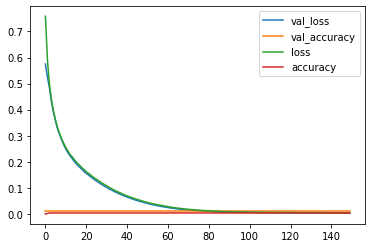

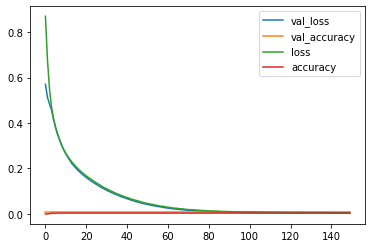

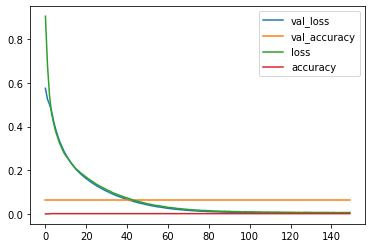

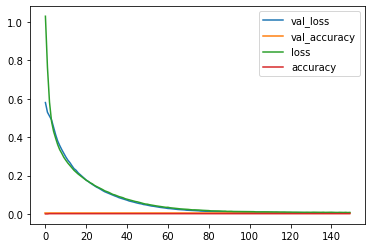

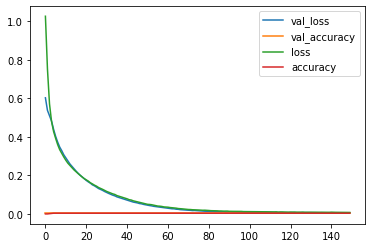

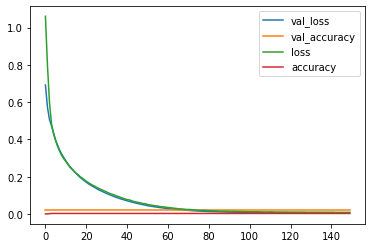

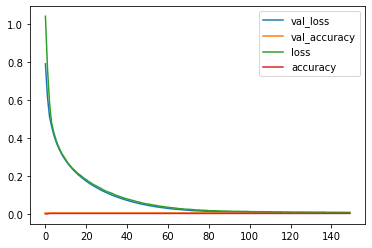

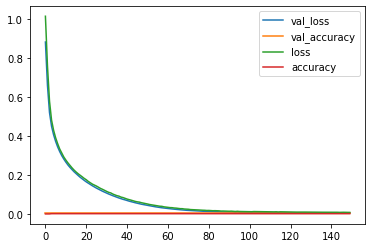

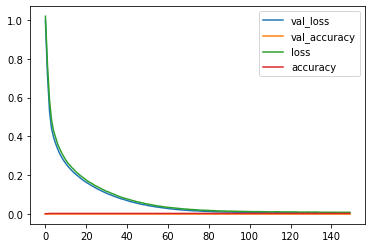

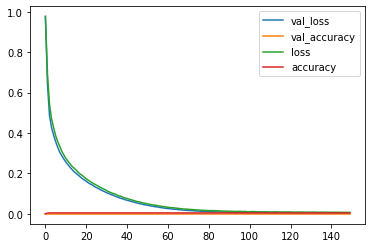

In [43]:

def lossPlotter(history_l):
    #metric_l =  [history.history['loss'] for history in history_l ]
    #val_loss = eval_metric(model, history.history, 'loss')
    #metric = history.history['loss']
    val_metric_l = [history.history['val_' + 'loss'] for history in history_l ]
    history_list = [history for history in  history_l ]
    for i,val_metric in enumerate (history_list):
        #pd.DataFrame(val_metric).plot()   
        pd.DataFrame(val_metric.history).plot()
lossPlotter(loopForModelFit(dataset_lolodf))

In [44]:
from keras.models import load_model
model_l = [load_model(fpath) for fpath in nameModel(Name = dir_model ,value = len (dataset_lolodf))]

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


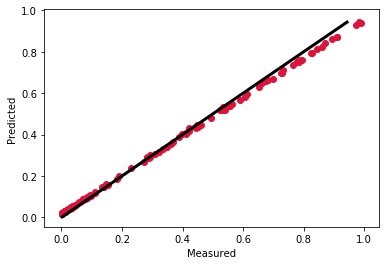

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from 

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f37426aaf90>)

In [45]:

def predict(df_l):
    
    from keras.models import load_model
    model_l = [load_model(fpath) for fpath in nameModel(Name = dir_model ,value = len (dataset_lolodf))]
    
    
    yhat_l= [model.predict(np.array(X_test_single[1]).reshape(np.array(X_test_single[1]).shape[0], k, n_features)) \
             for model, X_test_single in zip (model_l, df_l)]
    #plt.gca().spines['top'].set_visible(False)

    fig, ax = plt.subplots()
    for  yhat, ytest in zip (yhat_l, df_l):
        #plt.gca().spines['right'].set_visible(False)
        ax.scatter(ytest[-1], yhat,  c='crimson')
        ax.plot([ytest[-1].min(), yhat.max()], [ytest[-1].min(),  yhat.max()], 'k', lw=3)
        #plt.plot(y_test, yhat, zorder=1)  
        ax.set_xlabel('Measured')
        ax.set_ylabel('Predicted')
        plt.show()
    return fig, ax

predict(dataset_lolodf)

In [46]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

In [47]:
yhat_l= [model.predict(np.array(X_test_single[1]).reshape(np.array(X_test_single[1]).shape[0], k, n_features)) \
            for model, X_test_single in zip (model_l, dataset_lolodf)]


In [48]:
scalers = loopOverFunction(gross_tem_two)[1]

def unscale(y_values, scaler):
    return scaler.inverse_transform(y_values)

y_pred_unscaled_l, y_test_unscaled_l = \
[unscale(yhat, scaler) for yhat, scaler in zip \
 ( yhat_l, scalers)],[unscale(y_test[-1], scaler)\
                      for y_test, scaler in zip (dataset_lolodf, scalers)]


In [49]:
def listOfArrays2df(arr_l) :
    #df_list = [pd.DataFrame(arr) for arr in arr_l]
    df = pd.DataFrame(np.concatenate(arr_l, axis=1))
    df.columns  = [f"T{i}" for i in range (0, df.shape[1])]
    return df
    
y_pred_unscaled_df , y_test_unscaled_df = listOfArrays2df(y_pred_unscaled_l), listOfArrays2df(y_test_unscaled_l)

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f37424a2490>)

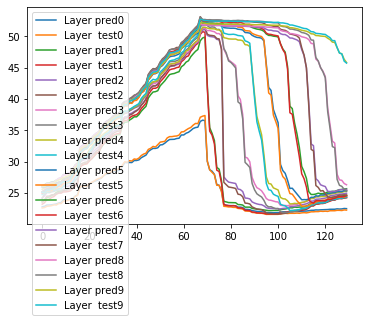

In [50]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
fig.show()
fig_size = plt.rcParams["figure.figsize"]
def plotyhat_ytest(ypred_df, y_test_df, ax, fig, alpha =0.7, scm=None):
    #model_l = [load_model(fpath) for fpath in nameModel(Name = dir_model ,value = len (dataset_lolodf))]
    
    
    #yhat_l= [model.predict(np.array(X_test_single[1]).reshape(np.array(X_test_single[1]).shape[0], k, n_features)) \
    #         for model, X_test_single in zip (model_l, df_l)]
    for i in range (0, ypred_df.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(ypred_df.index, ypred_df.iloc[:, i],\
                label = 'Layer pred' + str(i))
        ax.plot(y_test_df.index, y_test_df.iloc[:, i],\
                label = 'Layer  test' + str(i))
    plt.legend(loc='upper left')
    return fig, ax
plotyhat_ytest(y_pred_unscaled_df,y_test_unscaled_df, ax, fig, alpha =0.7, scm=None)

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x432 with 0 Axes>

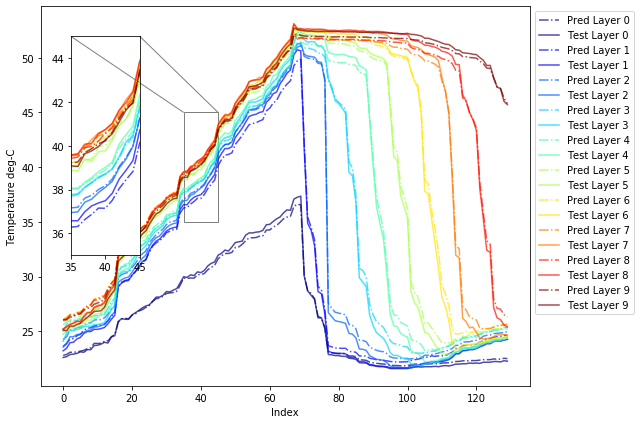

(<Figure size 648x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3742777150>)

In [52]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
def plotPredAndActualTem(yhat, ytest, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))
    #ax = fig.add_subplot()
    fig, ax = plt.subplots(1, figsize=(9,6))
    #fig.subplots_adjust(left=0.2, bottom=0.2)
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:10]
    tem_test_df =  pd.DataFrame(ytest).iloc[:,0:10]
    
   # len_df = len(tem_Pred_df)
    
    tem_PredZoom_df = tem_Pred_df.iloc[40:40, :]
    tem_TestZoom_df = tem_test_df.iloc[40:40, :]
    
    

    scm = create_color_step_obj(cmap_name, 10)
    
    #########################
    axins = zoomed_inset_axes(ax, 2,  loc=2, borderpad=3)
    mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
    axins.set_xlim([35,45])
    axins.set_ylim([35,45])
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        ax.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))
        


        axins.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        
        axins.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))

        #plt.show()
 
        '''
        sub_axes = plt.axes([.2, .55, .3, .3]) 
        sub_axes.plot(tem_PredZoom_df.index, tem_PredZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i)) 
        sub_axes.plot( tem_TestZoom_df.index,  tem_TestZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot') 
        '''
    
    
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    fig.savefig(fileNameForDLFigures(midfix = 'Tem_Charging'))
    return fig, ax
plotPredAndActualTem(y_pred_unscaled_df,y_test_unscaled_df, alpha =0.7, scm=None)